In [2]:
import requests
from bs4 import BeautifulSoup
import zipfile
import io
import pandas as pd
import re

# URL of the page containing the ZIP file links
index_url = "https://bidarchive.relayscan.io/ethereum/mainnet/2024-07/index.html"

# Fetch the content of the page
response = requests.get(index_url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extract all links that match the pattern
zip_urls = []
counter = 0
for link in soup.find_all('a', href=True):
    if counter > 2:
        break
    href = link['href']
    if re.match(r'\d{4}-\d{2}-\d{2}_all\.csv\.zip$', href):
        zip_urls.append(index_url.rsplit('/', 1)[0] + '/' + href)
        counter += 1


def download_and_extract_csv(zip_url):
    response = requests.get(zip_url)
    with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
        csv_files = [file for file in thezip.namelist() if file.endswith('.csv')]
        print(f"CSV files found: {csv_files}")  # Print the names of the CSV files
        frames = [pd.read_csv(thezip.open(file)) for file in csv_files]
        return pd.concat(frames, ignore_index=True)


# Combine all data into a single DataFrame
all_data = pd.concat([download_and_extract_csv(url) for url in zip_urls], ignore_index=True)


# Display the DataFrame
print(all_data.shape[0])




CSV files found: ['2024-07-01_all.csv']
CSV files found: ['2024-07-02_all.csv']
CSV files found: ['2024-07-03_all.csv']
48267191


In [3]:


# Extract all links that match the pattern
top_zip_urls = []
top_counter = 0
for link in soup.find_all('a', href=True):
    if top_counter > 2:
        break
    href = link['href']
    if re.match(r'\d{4}-\d{2}-\d{2}_top\.csv\.zip$', href):
        top_zip_urls.append(index_url.rsplit('/', 1)[0] + '/' + href)
        top_counter += 1


def download_and_extract_csv(zip_url):
    response = requests.get(zip_url)
    with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
        csv_files = [file for file in thezip.namelist() if file.endswith('.csv')]
        print(f"CSV files found: {csv_files}")  # Print the names of the CSV files
        frames = [pd.read_csv(thezip.open(file)) for file in csv_files]
        return pd.concat(frames, ignore_index=True)


# Combine all top data into a single DataFrame
top_data = pd.concat([download_and_extract_csv(url) for url in top_zip_urls], ignore_index=True)


# Display the DataFrame
print(top_data.shape[0])




CSV files found: ['2024-07-01_top.csv']
CSV files found: ['2024-07-02_top.csv']
CSV files found: ['2024-07-03_top.csv']
2835217


In [4]:
from data_prep_utils import *
from plot_prep_utils import *

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_builder = get_builder_info_from_latest_TLDR_talk()

print(all_data.shape[0])

df_builder = get_builder_info_from_latest_TLDR_talk()
print(df_builder["builder_label"].unique())

48267191
['BTCS' 'Beelder' 'Blocknative' 'BuildAI' 'Builder Boi'
 'Building Blocks, Breaking Chains' 'Buildooooooooooooooooooooooor'
 'EigenPhi' 'Gambit Labs' 'I can haz block?'
 'If you build it, they will come.' "It's Free Real Estate" 'Manifold'
 'Titan' 'Ty For The Block' 'antbuilder' 'ashpool' 'beaverbuild'
 'bloXroute' 'bobTheBuilder' 'boba-builder' 'builder0x69' 'default key'
 'eden' 'eth-builder' 'f1b' 'finest artisanal blocks' 'flashbots'
 'ibuilder' 'imposter' 'jetbldr' 'lightspeedbuilder' 'lokibuilder'
 'manta-builder' 'mars' 'merkle Block' 'miao' 'nfactorial' 'panda'
 'payload' 'penguin' 'red ocean surfer' 'rsync' 's0e2t' 'smithbot'
 'smithbuilder' 'spiderbuilder' 'tbuilder' 'uwu.builders' 'wenmerge']


In [5]:
df_bid_with_merged_builder_label = pd.merge(all_data, df_builder, on='builder_pubkey', how='left')
print(df_bid_with_merged_builder_label.shape[0])


48267191


In [6]:
# Get the min and max block numbers
min_block_number = all_data['block_number'].min()
max_block_number = all_data['block_number'].max()
print(f'Min Block Number: {min_block_number}')
print(f'Max Block Number: {max_block_number}')

csv_filename = 'tx_block_'+ str(min_block_number) + '_to_' + str(max_block_number) + '.csv'

df_onchain_block = pd.read_csv(csv_filename)

# 合并最新 builder label信息
df_onchain_block_with_merged_builder_label = pd.merge(df_onchain_block, df_builder, on='builder_pubkey', how='left', suffixes=('_old', ''))
print("total bids of the on chain blocks")
print(df_onchain_block.shape[0])



Min Block Number: 20207941
Max Block Number: 20229426
total bids of the on chain blocks
38291


In [7]:
df_bid_relay = df_bid_with_merged_builder_label['relay'].unique()
df_block_relay = df_onchain_block['relay'].unique()
print(df_bid_relay)
print(df_block_relay)   

bid_relays = [
    'agnostic-relay.net',
    'relay.ultrasound.money',
    'bloxroute.max-profit.blxrbdn.com',
    'boost-relay.flashbots.net',
    'bloxroute.regulated.blxrbdn.com',
    'titanrelay.xyz',
    'mainnet-relay.securerpc.com',
    'relay.wenmerge.com',
    'aestus.live',
    'relay.edennetwork.io',
    None
]

block_relays = [
    'agnostic',
    'ultrasound',
    'bloxroute_max_profit',
    'flashbots',
    'bloxroute_regulated',
    'titan',
    None,
    None,
    'aestus',
    'eden',
    'manifold'
]

df_relay = pd.DataFrame({
    'bid_relay': bid_relays,
    'block_relay': block_relays
})


['relay.ultrasound.money' 'agnostic-relay.net' 'boost-relay.flashbots.net'
 'bloxroute.max-profit.blxrbdn.com' 'aestus.live'
 'mainnet-relay.securerpc.com' 'relay.edennetwork.io'
 'bloxroute.regulated.blxrbdn.com' 'titanrelay.xyz' 'relay.wenmerge.com']
['agnostic' 'ultrasound' 'bloxroute_max_profit' 'flashbots'
 'bloxroute_regulated' 'titan' nan 'manifold' 'aestus' 'eden']


In [8]:
# 将 df_onchain_block_with_merged_builder_label 中的 relay 列转换为 block_relay
df_onchain_block_with_merged_builder_label = pd.merge(
    df_onchain_block_with_merged_builder_label, 
    df_relay[['block_relay', 'bid_relay']], 
    left_on='relay', 
    right_on='block_relay', 
    how='left'
).drop(columns=['block_relay', 'relay']).rename(columns={'bid_relay': 'relay'})


print('df_onchain_block_with_merged_builder_label')
print(df_onchain_block_with_merged_builder_label.columns)

# # 将 df_bid_with_merged_builder_label 中的 relay 列转换为 bid_relay
# df_bid_with_merged_builder_label = pd.merge(
#     df_bid_with_merged_builder_label, 
#     df_relay[['block_relay', 'bid_relay']], 
#     left_on='relay', 
#     right_on='bid_relay', 
#     how='left'
# ).drop(columns=['bid_relay', 'relay']).rename(columns={'block_relay': 'relay'})


# print('df_bid_with_merged_builder_label')
# print(df_bid_with_merged_builder_label.columns)

# 合并两个 DataFrame，按 block_number、value、relay 和 builder_label 匹配
# merged = pd.merge(
#     df_bid_with_merged_builder_label, 
#     df_onchain_block_with_merged_builder_label, 
#     on=['block_number', 'value', 'relay', 'builder_label'], 
#     suffixes=('_bid', '_onchain')
# )

# # 筛选 timestamp_ms 和 bid_timestamp_ms 匹配的行
# matching_rows = merged[merged['timestamp_ms'] == merged['bid_timestamp_ms']]

# # 打印找到的匹配行
# print("Matching rows:")
# print(matching_rows)


df_onchain_block_with_merged_builder_label
Index(['block_datetime', 'slot', 'block_number', 'block_hash', 'value',
       'base_fee_per_gas', 'gas_limit', 'gas_used', 'num_tx',
       'builder_label_old', 'builder_pubkey', 'bid_timestamp_ms',
       'slot_time_ms', 'proposer_pubkey', 'proposer_mev_recipient',
       'optimistic_submission', 'block_timestamp', 'extra_data',
       'payload_delivered', 'builder_label', 'relay'],
      dtype='object')


In [9]:
merged = pd.merge(df_bid_with_merged_builder_label, 
                  df_onchain_block_with_merged_builder_label, 
                  on=['block_number', 'value', 'relay', 'builder_label'], 
                  suffixes=('_bid', '_onchain'))

# 筛选 timestamp_ms 和 bid_timestamp_ms 匹配的行
matching_rows = merged[merged['timestamp_ms'] == merged['bid_timestamp_ms']]

# 打印找到的匹配行
print("Matching rows:")
print(matching_rows)

Matching rows:
       source_type  received_at_ms     timestamp_ms  slot_bid  slot_t_ms  \
0                1   1719792013942 1719792011014.00   9413999      14.00   
2                1   1719792037939 1719792035204.00   9414001     204.00   
4                1   1719792067814 1719792048876.00   9414002    1876.00   
6                1   1719792085955 1719792083697.00   9414005     697.00   
7                1   1719792091949 1719792071771.00   9414004     771.00   
...            ...             ...              ...       ...        ...   
24698            1   1720051069721 1720051067709.00   9435587     709.00   
24699            1   1720051075824 1720051055784.00   9435586     784.00   
24705            1   1720051105085 1720051103686.00   9435590     686.00   
24707            1   1720051123946 1720051103629.00   9435590     629.00   
24711            1   1720051183083 1720051163797.00   9435595     797.00   

                      value  \
0     106933140897191680.00   
2      420

In [13]:
# 首先对 df_bid_with_merged_builder_label 和 matching_rows 进行合并
merged_df = pd.merge(
    df_bid_with_merged_builder_label,
    matching_rows[['block_number', 'value', 'relay', 'timestamp_ms', 'builder_label']],
    on=['block_number', 'relay'],
    suffixes=('_bid', '_match')
)

# 筛选出 value 小于 matching_rows 中的 value 且是次大值的记录
filtered_df = merged_df[
    (merged_df['value_bid'] < merged_df['value_match']) &
    (merged_df['timestamp_ms_bid'] < merged_df['timestamp_ms_match']) &
    (merged_df['builder_label_bid'] != merged_df['builder_label_match'])
]

# 对于每组 (block_number, relay, value_match)，找到次大值的记录
def get_second_highest(group):
    return group.loc[group['value_bid'].idxmax()]

df_selected_bids = filtered_df.groupby(['block_number', 'relay', 'value_match']).apply(get_second_highest).reset_index(drop=True)

# 按行合并 matching_rows 和 df_selected_bids，保留 df_selected_bids 中的列
combined_df = pd.concat([matching_rows, df_selected_bids], ignore_index=True)

# # 保留 df_selected_bids 中的列
# df_selected_columns = df_selected_bids.columns.tolist()
# combined_df = combined_df[df_selected_columns]

# 打印结果
print("Combined DataFrame:")
print(combined_df.columns)
print(combined_df)

Combined DataFrame:
Index(['source_type', 'received_at_ms', 'timestamp_ms', 'slot_bid',
       'slot_t_ms', 'value', 'block_hash_bid', 'parent_hash',
       'builder_pubkey_bid', 'block_number', 'block_fee_recipient', 'relay',
       'proposer_pubkey_bid', 'proposer_fee_recipient',
       'optimistic_submission_bid', 'builder_label', 'block_datetime',
       'slot_onchain', 'block_hash_onchain', 'base_fee_per_gas', 'gas_limit',
       'gas_used', 'num_tx', 'builder_label_old', 'builder_pubkey_onchain',
       'bid_timestamp_ms', 'slot_time_ms', 'proposer_pubkey_onchain',
       'proposer_mev_recipient', 'optimistic_submission_onchain',
       'block_timestamp', 'extra_data', 'payload_delivered',
       'timestamp_ms_bid', 'slot', 'value_bid', 'block_hash', 'builder_pubkey',
       'proposer_pubkey', 'optimistic_submission', 'builder_label_bid',
       'value_match', 'timestamp_ms_match', 'builder_label_match'],
      dtype='object')
       source_type  received_at_ms     timestamp_ms  

/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_26074/647781813.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_selected_bids = filtered_df.groupby(['block_number', 'relay', 'value_match']).apply(get_second_highest).reset_index(drop=True)


/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_26074/90449441.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = combined_df.groupby(['block_number', 'relay']).apply(find_top_two_values).reset_index(drop=True)
/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_26074/90449441.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_value_builders = grouped.groupby(['block_numbe

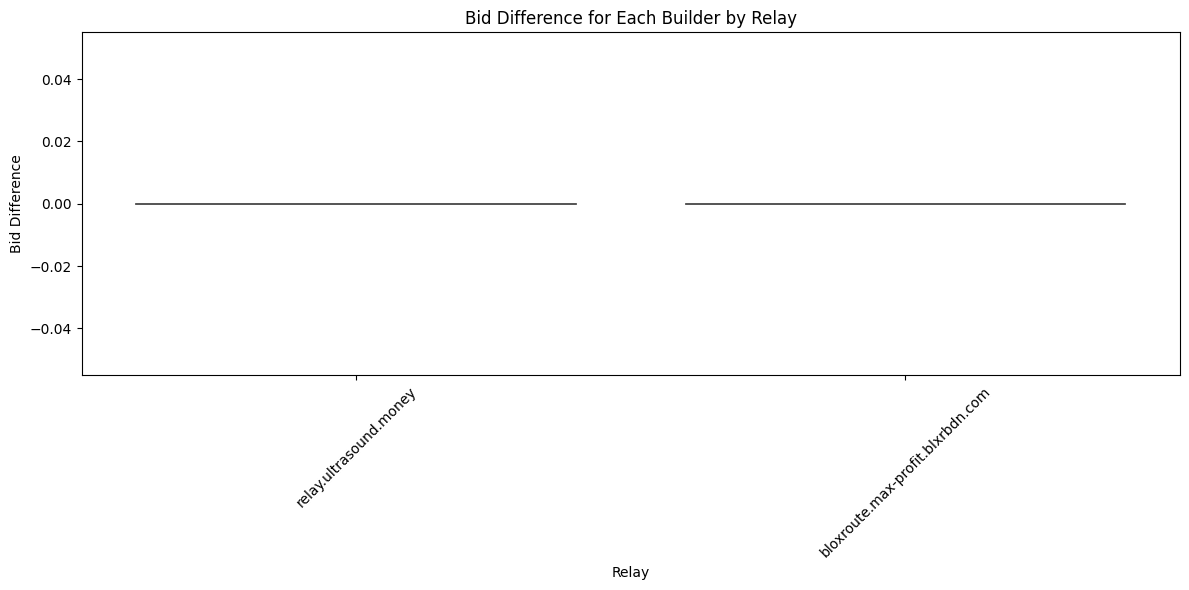

In [14]:
# 绘制小提琴图

import seaborn as sns
import matplotlib.pyplot as plt

# 按 block_number 和 relay 分组，并找到每组的最大和第二大 value 及其对应的 builder
def find_top_two_values(group):
    top_two = group.nlargest(2, 'value')
    return top_two

grouped = combined_df.groupby(['block_number', 'relay']).apply(find_top_two_values).reset_index(drop=True)

# 计算每组的最大和第二大 value 的差值
grouped['value_diff'] = grouped.groupby(['block_number', 'relay'])['value'].diff().abs()
grouped = grouped.dropna(subset=['value_diff'])

# 获取最大 value 的 builder 和 relay
max_value_builders = grouped.groupby(['block_number', 'relay']).apply(lambda x: x.nlargest(1, 'value')).reset_index(drop=True)

# 合并最大 value 的 builder 和其对应的 relay
merged = pd.merge(grouped, max_value_builders[['block_number', 'relay', 'builder_label']], on=['block_number', 'relay'], suffixes=('', '_max'))

# 筛选最大 value 的 builder 对应的行
plot_df = merged[merged['builder_label'] == merged['builder_label_max']]

# 绘制小提琴图
plt.figure(figsize=(12, 6))
sns.violinplot(x='relay', y='value_diff', data=plot_df)
plt.title('Bid Difference for Each Builder by Relay')
plt.xlabel('Relay')
plt.ylabel('Bid Difference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
print(matching_rows.columns)
print(df_bid_with_merged_builder_label.columns)
# df_paid = df_bid_with_merged_builder_label[df_bid_with_merged_builder_label['payload_delivered'] == True]
# print(df_paid.shape[0])

Index(['source_type', 'received_at_ms', 'timestamp_ms', 'slot_bid',
       'slot_t_ms', 'value', 'block_hash_bid', 'parent_hash',
       'builder_pubkey_bid', 'block_number', 'block_fee_recipient', 'relay',
       'proposer_pubkey_bid', 'proposer_fee_recipient',
       'optimistic_submission_bid', 'builder_label', 'block_datetime',
       'slot_onchain', 'block_hash_onchain', 'base_fee_per_gas', 'gas_limit',
       'gas_used', 'num_tx', 'builder_label_old', 'builder_pubkey_onchain',
       'bid_timestamp_ms', 'slot_time_ms', 'proposer_pubkey_onchain',
       'proposer_mev_recipient', 'optimistic_submission_onchain',
       'block_timestamp', 'extra_data', 'payload_delivered'],
      dtype='object')
Index(['source_type', 'received_at_ms', 'timestamp_ms', 'slot', 'slot_t_ms',
       'value', 'block_hash', 'parent_hash', 'builder_pubkey', 'block_number',
       'block_fee_recipient', 'relay', 'proposer_pubkey',
       'proposer_fee_recipient', 'optimistic_submission', 'builder_label'],
  

In [37]:

# print("total block number: ")
# print(df_onchain_block['block_number'].nunique())


# 按照block number, value, relay进行groupby，计算 bid次数
df_onchain_unique_bids = df_onchain_block.groupby(['block_number', 'value', 'relay']).size().reset_index(name='bid_counts_by_key')
print("total unique bids of the on chain blocks")
print(df_onchain_unique_bids.shape[0])

# 按照block number, value, relay, builder_label进行groupby，计算 bid次数
df_onchain_unique_bids_by_builder = df_onchain_block.groupby(['block_number', 'value', 'relay', 'builder_label']).size().reset_index(name='bid_counts_by_builder')
print("total unique bids of the on chain blocks by builder")
print(df_onchain_unique_bids_by_builder.shape[0])


Min Block Number: 20207941
Max Block Number: 20229426
total bids of the on chain blocks
38291
total unique bids of the on chain blocks
36493
total unique bids of the on chain blocks by builder
36488


In [15]:
# 找出 df_onchain_unique_bids 和 df_onchain_unique_bids_by_builder 之间的差异行
# 首先，从 df_onchain_unique_bids_by_builder 中去掉 builder_label 列，以便比较
df_onchain_unique_bids_simplified = df_onchain_unique_bids_by_builder.drop(columns=['builder_label', 'bid_counts_by_builder']).copy()
df_onchain_unique_bids_simplified['key'] = 1  # 添加一个辅助列以便进行合并

# 添加一个辅助列到 df_onchain_unique_bids，以便进行合并
df_onchain_unique_bids['key'] = 1

# 使用 merge 合并两个数据帧
merged = pd.merge(df_onchain_unique_bids, df_onchain_unique_bids_simplified, on=['block_number', 'value', 'relay', 'key'], how='outer', indicator=True)

# 找出在 df_onchain_unique_bids 中存在但不在 df_onchain_unique_bids_simplified 中的行
difference_in_unique_bids = merged[merged['_merge'] == 'left_only']

# 找出在 df_onchain_unique_bids_simplified 中存在但不在 df_onchain_unique_bids 中的行
difference_in_unique_bids_by_builder = merged[merged['_merge'] == 'right_only']

# 打印差异行
print("Rows in df_onchain_unique_bids but not in df_onchain_unique_bids_by_builder:")
print(difference_in_unique_bids)


# 根据 difference_in_unique_bids 中的 block_number, value, relay 找出 df_onchain_block_with_merged_builder_label 中的对应数据行
matching_rows = df_onchain_block_with_merged_builder_label.merge(difference_in_unique_bids[['block_number', 'value', 'relay']], on=['block_number', 'value', 'relay'], how='inner')

# 打印找到的对应数据行, 这些行中的builder_label为空
print("Matching rows in df_onchain_block for difference_in_unique_bids:")
print(matching_rows)


# 从 df_onchain_block_with_merged_builder_label 中删除这些匹配的行
df_onchain_block_dropped = df_onchain_block_with_merged_builder_label.merge(difference_in_unique_bids[['block_number', 'value', 'relay']], on=['block_number', 'value', 'relay'], how='left', indicator=True)
df_onchain_block_dropped = df_onchain_block_dropped[df_onchain_block_dropped['_merge'] == 'left_only'].drop(columns=['_merge'])

# 打印删除后的 DataFrame
print("DataFrame after dropping matching rows:")
print(df_onchain_block_dropped)

# 根据 difference_in_unique_bids 中的 block_number, value, relay 找出 df_onchain_block_dropped 中的对应数据行
matching_rows_after_delete = df_onchain_block_dropped.merge(difference_in_unique_bids[['block_number', 'value', 'relay']], on=['block_number', 'value', 'relay'], how='inner')

# 打印找到的对应数据行, 这些行中的 builder_label 为空
print("After Delete: Matching rows in df_onchain_block_dropped for difference_in_unique_bids:")
print(matching_rows_after_delete)

Rows in df_onchain_unique_bids but not in df_onchain_unique_bids_by_builder:
       block_number                  value                relay  \
626        20208309 1763680389588090112.00  bloxroute_regulated   
3134       20209740   68761545393998920.00           ultrasound   
17144      20217941  204953066076304576.00           ultrasound   
26317      20223399  617397212022392320.00           ultrasound   
34086      20228025  150153902827810816.00           ultrasound   

       bid_counts_by_key  key     _merge  
626                    1    1  left_only  
3134                   1    1  left_only  
17144                  1    1  left_only  
26317                  1    1  left_only  
34086                  1    1  left_only  
Matching rows in df_onchain_block for difference_in_unique_bids:
        block_datetime     slot  block_number  \
0  2024-07-01 01:12:47  9414362      20208309   
1  2024-07-01 06:00:11  9415799      20209740   
2  2024-07-02 09:29:11  9424044      20217941   
3

In [18]:
print('df_onchain_unique_bids_by_builder: the onchain blocks bids with builder label')
print(df_onchain_unique_bids_by_builder.columns)
print('df_bid_with_merged_builder_label: all the bids with builder label')
print(df_bid_with_merged_builder_label.columns)

print('df_onchain_block_with_merged_builder_label')
print(df_onchain_block_with_merged_builder_label.columns)

df_onchain_unique_bids_by_builder: the onchain blocks bids with builder label
Index(['block_number', 'value', 'relay', 'builder_label',
       'bid_counts_by_builder'],
      dtype='object')
df_bid_with_merged_builder_label: all the bids with builder label
Index(['source_type', 'received_at_ms', 'timestamp_ms', 'slot', 'slot_t_ms',
       'value', 'block_hash', 'parent_hash', 'builder_pubkey', 'block_number',
       'block_fee_recipient', 'relay', 'proposer_pubkey',
       'proposer_fee_recipient', 'optimistic_submission', 'builder_label'],
      dtype='object')
df_onchain_block_with_merged_builder_label
Index(['block_datetime', 'slot', 'block_number', 'block_hash', 'value',
       'base_fee_per_gas', 'gas_limit', 'gas_used', 'num_tx',
       'builder_label_old', 'builder_pubkey', 'relay', 'bid_timestamp_ms',
       'slot_time_ms', 'proposer_pubkey', 'proposer_mev_recipient',
       'optimistic_submission', 'block_timestamp', 'extra_data',
       'payload_delivered', 'builder_label'],


In [21]:
df_block = df_onchain_block_with_merged_builder_label[df_onchain_block_with_merged_builder_label['block_number'] == 20207980]

df_bids = df_bid_with_merged_builder_label[df_bid_with_merged_builder_label['block_number'] == 20207980]

print(df_block)

print(df_bids.head(4))

         block_datetime     slot  block_number  \
67  2024-07-01 00:06:23  9414030      20207980   
68  2024-07-01 00:06:23  9414030      20207980   
69  2024-07-01 00:06:23  9414030      20207980   
70  2024-07-01 00:06:23  9414030      20207980   

                                           block_hash                value  \
67  0x07a1495e1dbf9744217cc16a0fbddbb7f317b42299e4... 32227102884311140.00   
68  0x07a1495e1dbf9744217cc16a0fbddbb7f317b42299e4... 32227102884311140.00   
69  0x07a1495e1dbf9744217cc16a0fbddbb7f317b42299e4... 32227102884311140.00   
70  0x07a1495e1dbf9744217cc16a0fbddbb7f317b42299e4... 32227102884311140.00   

    base_fee_per_gas   gas_limit  gas_used  num_tx builder_label_old  ...  \
67     2458950810.00 30000000.00  15414864  115.00   beaverbuild.org  ...   
68     2458950810.00 30000000.00  15414864  115.00   beaverbuild.org  ...   
69     2458950810.00 30000000.00  15414864  115.00   beaverbuild.org  ...   
70     2458950810.00 30000000.00  15414864  115.00

In [19]:

# 假设 df_onchain_block_with_merged_builder_label 和 df_bid_with_merged_builder_label 是已经存在的 DataFrame

# 合并两个 DataFrame，按 block_number、value、relay 和 builder_label 匹配
merged = pd.merge(df_bid_with_merged_builder_label, 
                  df_onchain_block_with_merged_builder_label, 
                  on=['block_number', 'value', 'relay', 'builder_label'], 
                  suffixes=('_bid', '_onchain'))

# 筛选 timestamp_ms 和 bid_timestamp_ms 匹配的行
matching_rows = merged[merged['timestamp_ms'] == merged['bid_timestamp_ms']]

# 打印找到的匹配行
print("Matching rows:")
print(matching_rows)

Matching rows:
Empty DataFrame
Columns: [source_type, received_at_ms, timestamp_ms, slot_bid, slot_t_ms, value, block_hash_bid, parent_hash, builder_pubkey_bid, block_number, block_fee_recipient, relay, proposer_pubkey_bid, proposer_fee_recipient, optimistic_submission_bid, builder_label, block_datetime, slot_onchain, block_hash_onchain, base_fee_per_gas, gas_limit, gas_used, num_tx, builder_label_old, builder_pubkey_onchain, bid_timestamp_ms, slot_time_ms, proposer_pubkey_onchain, proposer_mev_recipient, optimistic_submission_onchain, block_timestamp, extra_data, payload_delivered]
Index: []

[0 rows x 33 columns]
